In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

In [2]:

def ftfs(south, southeast, c, delta_t, delta_x):
    """
    Calculates the ftfs scheme
    Input:
        south:     The soutern point aka v_i_j
        southeast: v_i+1_j
    
    Output:
        v_i_{j+1}: The newly calculated point
    """
    
    factor = c*delta_t/delta_x
    return (1-factor)*south + factor*southeast

def ftcs(south, southeast, southwest, c, delta_t, delta_x):
    """
    Calculates the ftcs scheme
    Input:
        south:     v_i_j
        southeast: v_i+1_j
        southwest: v_i-1,j
    
    Output:
        v_i_{j+1}: The newly calculated point
    """
    
    factor = c*delta_t/(2*delta_x)
    return south - factor*(southeast - southwest)

def upwind(south, southwest, c, delta_t, delta_x):
    """
    Calculates the upwind scheme
    Input:
        south:     v_i_j
        southwest: v_i-1_j
    
    Output:
        v_i_{j+1}: The newly calculated point
    """
    
    factor = c*delta_t/delta_x
    return (1-factor)*south + factor*southwest

def lax(southeast, southwest, c, delta_t, delta_x):
    """
    Calculates the lax-friedrich scheme
    Input:
        southeast: v_i+1_j
        southwest: v_i-1_j
    
    Output:
        v_i_{j+1}: The newly calculated point
    """
    
    factor = c*delta_t/(2*delta_x)
    return 0.5*(southeast + southwest) - factor*(southeast - southwest)

def u_0(x):
    """
    calculate the value of u_0 at x, also takes np.arrays as arguments
    Input:
        x: point(value) or points(as np.array) where to evaluate the function
    """
    return np.exp(-10*(x-2)**2)

# Approximate solutions

In [7]:
T = 150 # maximum number of the time, here the max we should plot is 150
omega_boundaries = (0,10)
delta_t = 0.05
delta_x = 0.05
c = 0.5

In [8]:
#calculate the initial solution array which is the same for every scheme

def give_initial_solution(delta_x, delta_t, c):

    num_points_time = int(T/delta_t)+1
    num_points_space = int((omega_boundaries[1] - omega_boundaries[0])/delta_x)+1
    sol_array = np.empty((num_points_time, num_points_space))
    sol_array[:] = np.nan

    sol_at_time_zero = u_0(np.arange(omega_boundaries[0], omega_boundaries[1]+delta_x, delta_x))
    sol_at_left_border = u_0(-1*c*np.arange(0, T+delta_t, delta_t))
    sol_at_right_border = u_0(10 - c*np.arange(0, T+delta_t, delta_t))
    #print(sol_at_time_zero[0], sol_at_left_border[0])
    #print(sol_at_time_zero[-1], sol_at_right_border[0])
    #print(sol_at_time_zero.shape, sol_at_left_border.shape, sol_at_right_border.shape)
    sol_array[0,:] = sol_at_time_zero
    sol_array[:,0] = sol_at_left_border
    sol_array[:,-1] = sol_at_right_border
    #print(sol_at_time_zero[0], sol_at_time_zero[-1])
    #print(sol_at_left_border[0], sol_at_left_border[-1])
    #print(sol_at_right_border[0], sol_at_right_border[-1])
    return sol_array

give_initial_solution(delta_x, delta_t, c).shape

(3001, 201)

In [9]:
# calculate the solution arrays
def calculate_ftfs(delta_x, delta_t, c):
    #print(delta_x, delta_t)
    ftfs_sol = give_initial_solution(delta_x, delta_t, c)
    #print(np.isnan(ftfs_sol[0]).any())
    for j in range(1, ftfs_sol.shape[0]):
        for i in range(1, ftfs_sol.shape[1]-1):
            ftfs_sol[j][i] = ftfs(ftfs_sol[j-1][i], ftfs_sol[j-1][i+1], c, delta_t, delta_x)
    return ftfs_sol

def calculate_ftcs(delta_x, delta_t, c):
    ftcs_sol = give_initial_solution(delta_x, delta_t, c)
    for j in range(1, ftcs_sol.shape[0]):
        for i in range(1, ftcs_sol.shape[1]-1):
            ftcs_sol[j][i] = ftcs(ftcs_sol[j-1][i], ftcs_sol[j-1][i+1], ftcs_sol[j-1][i-1], c, delta_t, delta_x)
    return ftcs_sol

def calculate_upwind(delta_x, delta_t, c):
    upwind_sol = give_initial_solution(delta_x, delta_t, c)
    for j in range(1, upwind_sol.shape[0]):
        for i in range(1, upwind_sol.shape[1]-1):
            upwind_sol[j][i] = upwind(upwind_sol[j-1][i], upwind_sol[j-1][i-1], c, delta_t, delta_x)
    return upwind_sol

def calculate_lax(delta_x, delta_t, c):
    lax_sol = give_initial_solution(delta_x, delta_t, c)
    for j in range(1, lax_sol.shape[0]):
        for i in range(1, lax_sol.shape[1]-1):
            lax_sol[j][i] = lax(lax_sol[j-1][i+1], lax_sol[j-1][i-1], c, delta_t, delta_x)
    return lax_sol

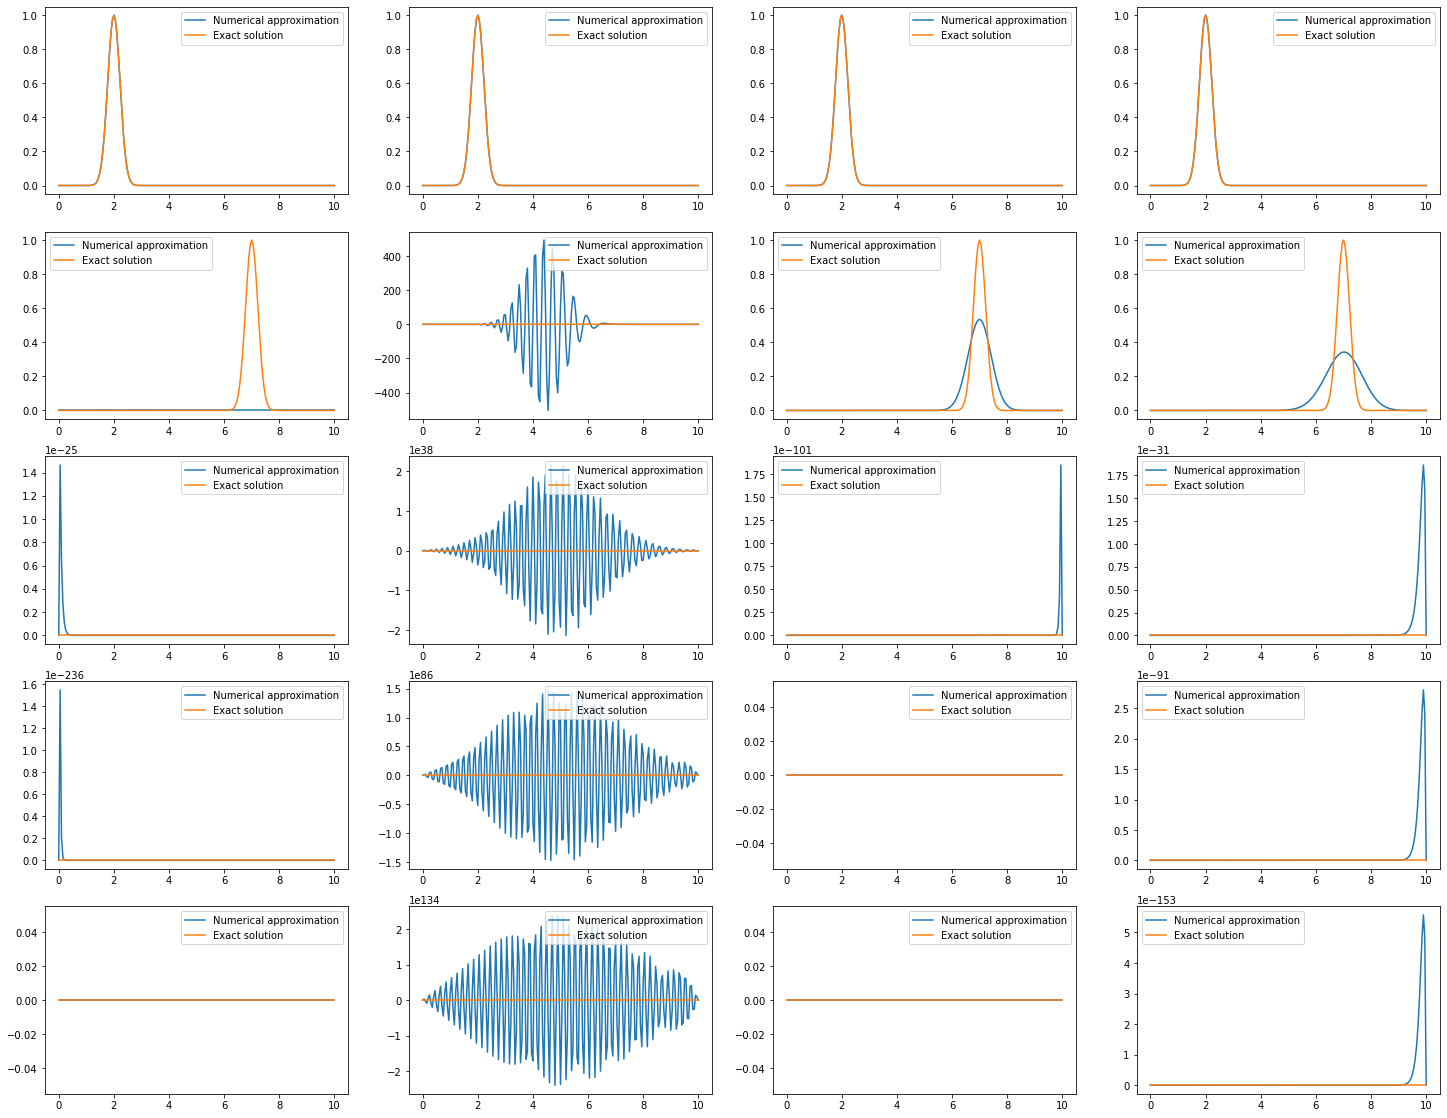

In [10]:
fig, axes = plt.subplots(5, 4, figsize = (25,20))

t_array = [0, 10, 50, 100, 150]
xx = np.arange(omega_boundaries[0], omega_boundaries[1]+delta_x, delta_x)
func_array = [calculate_ftfs, calculate_ftcs, calculate_upwind, calculate_lax]
for i in range(5):
    for j in range(4):
        res = func_array[j](delta_x, delta_t, c)
        #print(np.isnan(res[t_array[i]]).any())
        yy_num = res[int(t_array[i]/delta_t)]
        yy_exact = u_0(xx - c*t_array[i])
        axes[i][j].plot(xx, yy_num, label="Numerical approximation")
        axes[i][j].plot(xx, yy_exact, label="Exact solution")
        axes[i,j].legend()
